In [444]:
import requests
import re
from bs4 import BeautifulSoup, Comment


import numpy as np
import pandas as pd
import time

from pymongo import MongoClient
from pprint import pprint


import matplotlib.pyplot as plt
import scipy.stats as stats

# Read in Mongo DB


In [59]:
client = MongoClient()
database = client['NBA_tables']
collection = database['seasons']


In [89]:
res = collection.find({})
ret = list(res)


18

# Beautiful Soup Each Table and Assign to Variable

In [108]:
season_01_misc = BeautifulSoup(str(ret[0].get('misc_tables')), 'lxml') 
season_01_team = BeautifulSoup(str(ret[0].get('team_stats_table')), 'lxml')  
season_01_shoot = BeautifulSoup(str(ret[0].get('shooting_table')), 'lxml') 

season_02_misc = BeautifulSoup(str(ret[1].get('misc_tables')), 'lxml') 
season_02_team = BeautifulSoup(str(ret[1].get('team_stats_table')), 'lxml')  
season_02_shoot = BeautifulSoup(str(ret[1].get('shooting_table')), 'lxml') 

season_03_misc = BeautifulSoup(str(ret[2].get('misc_tables')), 'lxml') 
season_03_team = BeautifulSoup(str(ret[2].get('team_stats_table')), 'lxml')  
season_03_shoot = BeautifulSoup(str(ret[2].get('shooting_table')), 'lxml') 

season_04_misc = BeautifulSoup(str(ret[3].get('misc_tables')), 'lxml') 
season_04_team = BeautifulSoup(str(ret[3].get('team_stats_table')), 'lxml')  
season_04_shoot = BeautifulSoup(str(ret[3].get('shooting_table')), 'lxml') 

season_05_misc = BeautifulSoup(str(ret[4].get('misc_tables')), 'lxml') 
season_05_team = BeautifulSoup(str(ret[4].get('team_stats_table')), 'lxml')  
season_05_shoot = BeautifulSoup(str(ret[4].get('shooting_table')), 'lxml') 

season_06_misc = BeautifulSoup(str(ret[5].get('misc_tables')), 'lxml') 
season_06_team = BeautifulSoup(str(ret[5].get('team_stats_table')), 'lxml')  
season_06_shoot = BeautifulSoup(str(ret[5].get('shooting_table')), 'lxml') 

season_07_misc = BeautifulSoup(str(ret[6].get('misc_tables')), 'lxml') 
season_07_team = BeautifulSoup(str(ret[6].get('team_stats_table')), 'lxml')  
season_07_shoot = BeautifulSoup(str(ret[6].get('shooting_table')), 'lxml') 

season_08_misc = BeautifulSoup(str(ret[7].get('misc_tables')), 'lxml') 
season_08_team = BeautifulSoup(str(ret[7].get('team_stats_table')), 'lxml')  
season_08_shoot = BeautifulSoup(str(ret[7].get('shooting_table')), 'lxml') 

season_09_misc = BeautifulSoup(str(ret[8].get('misc_tables')), 'lxml') 
season_09_team = BeautifulSoup(str(ret[8].get('team_stats_table')), 'lxml')  
season_09_shoot = BeautifulSoup(str(ret[8].get('shooting_table')), 'lxml') 

season_10_misc = BeautifulSoup(str(ret[9].get('misc_tables')), 'lxml') 
season_10_team = BeautifulSoup(str(ret[9].get('team_stats_table')), 'lxml')  
season_10_shoot = BeautifulSoup(str(ret[9].get('shooting_table')), 'lxml') 

season_11_misc = BeautifulSoup(str(ret[10].get('misc_tables')), 'lxml') 
season_11_team = BeautifulSoup(str(ret[10].get('team_stats_table')), 'lxml')  
season_11_shoot = BeautifulSoup(str(ret[10].get('shooting_table')), 'lxml') 

season_12_misc = BeautifulSoup(str(ret[11].get('misc_tables')), 'lxml') 
season_12_team = BeautifulSoup(str(ret[11].get('team_stats_table')), 'lxml')  
season_12_shoot = BeautifulSoup(str(ret[11].get('shooting_table')), 'lxml') 

season_13_misc = BeautifulSoup(str(ret[12].get('misc_tables')), 'lxml') 
season_13_team = BeautifulSoup(str(ret[12].get('team_stats_table')), 'lxml')  
season_13_shoot = BeautifulSoup(str(ret[12].get('shooting_table')), 'lxml') 

season_14_misc = BeautifulSoup(str(ret[13].get('misc_tables')), 'lxml') 
season_14_team = BeautifulSoup(str(ret[13].get('team_stats_table')), 'lxml')  
season_14_shoot = BeautifulSoup(str(ret[13].get('shooting_table')), 'lxml') 

season_15_misc = BeautifulSoup(str(ret[14].get('misc_tables')), 'lxml') 
season_15_team = BeautifulSoup(str(ret[14].get('team_stats_table')), 'lxml')  
season_15_shoot = BeautifulSoup(str(ret[14].get('shooting_table')), 'lxml') 

season_16_misc = BeautifulSoup(str(ret[15].get('misc_tables')), 'lxml') 
season_16_team = BeautifulSoup(str(ret[15].get('team_stats_table')), 'lxml')  
season_16_shoot = BeautifulSoup(str(ret[15].get('shooting_table')), 'lxml') 

season_17_misc = BeautifulSoup(str(ret[16].get('misc_tables')), 'lxml') 
season_17_team = BeautifulSoup(str(ret[16].get('team_stats_table')), 'lxml')  
season_17_shoot = BeautifulSoup(str(ret[16].get('shooting_table')), 'lxml') 

season_18_misc = BeautifulSoup(str(ret[17].get('misc_tables')), 'lxml') 
season_18_team = BeautifulSoup(str(ret[17].get('team_stats_table')), 'lxml')  
season_18_shoot = BeautifulSoup(str(ret[17].get('shooting_table')), 'lxml') 

# Convert BeautifulSoup Object to Pandas Dataframes

In [322]:
def df_maker(misc, team, shoot): 
    '''
    This function takes in the three beautiful soup objects for a specified year and then joins them together with
    the selected columns.
    
    
    input: 
    misc: Beautiful Soup object for the Miscellaneous table for the desired year
        Columns selected:'Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%'
        
    team: Beautiful Soup object for the Team Stats table for the desired year
        Columns selected: 'Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS'
        
    shoot: Beautiful Soup object for the Shooting table for the desired year
        Columns selected: 'Team', 'Dist.', '2P' , '0-3', '3-10', '10-16'
    
    output: Merged Pandas DataFrame with all the desired statistics for each team
        Columns after join:'Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%', 'FG%', 'AST', 'TOV', 'PF', 'PTS''Dist.', '2P' , '0-3', '3-10', '10-16' 
        Also sets the row index to the team names and creates column 'Playoffs' where 0= did not make playoffs 
        and 1 = made the playoffs
    
    '''
    misc_list = []
    for comment in misc.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            misc_list.append(tds)
    wdf_misc_01 = pd.DataFrame(misc_list[2:], columns= misc_list[1])       
    df_misc_01 = wdf_misc_01[['Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%']]



    team_stats_list = []
    for comment in team.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            team_stats_list.append(tds)
    wdf_team_01 = pd.DataFrame(team_stats_list[1:], columns= team_stats_list[0])       
    df_team_01 = wdf_team_01[['Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS']]


    shoot_stats = []
    for comment in shoot.find_all(string=lambda text:isinstance(text,Comment)):
        data = BeautifulSoup(comment,"lxml")
        for items in data.select("table.stats_table tr"):
            tds = [item.get_text(strip=True) for item in items.select("th,td")]
            shoot_stats.append(tds)

    wdf_shoot_01 = pd.DataFrame(shoot_stats[3:], columns = shoot_stats[2])
    wwdf_shoot_01 = wdf_shoot_01.iloc[:, 0:11]
    df_shoot_01 = wwdf_shoot_01[['Team', 'Dist.', '2P' , '0-3', '3-10', '10-16']]

    team_misc = pd.merge(df_misc_01, df_team_01, on='Team', how='outer')
    #before_created_columns =  
    full =  pd.merge(team_misc, df_shoot_01, on='Team', how='outer')
    full['Playoffs'] = (full.Team.map(lambda x: 1 if '*' in str(x) else 0))
    fuller =full.set_index(list(df)[0])
    final = fuller.apply(pd.to_numeric)
    return final
    

#### Run the beautifulsoup objects through function above to create Dataframe for each season

In [458]:
season_2001 = df_maker(season_01_misc, season_01_team, season_01_shoot)
season_2002 = df_maker(season_02_misc, season_02_team, season_02_shoot)
season_2003 = df_maker(season_03_misc, season_03_team, season_03_shoot)
season_2004 = df_maker(season_04_misc, season_04_team, season_04_shoot)
season_2005 = df_maker(season_05_misc, season_05_team, season_05_shoot)
season_2006 = df_maker(season_06_misc, season_06_team, season_06_shoot)
season_2007 = df_maker(season_07_misc, season_07_team, season_07_shoot)
season_2008 = df_maker(season_08_misc, season_08_team, season_08_shoot)
season_2009 = df_maker(season_09_misc, season_09_team, season_09_shoot)
season_2010 = df_maker(season_10_misc, season_10_team, season_10_shoot)
season_2011 = df_maker(season_11_misc, season_11_team, season_11_shoot)
season_2012 = df_maker(season_12_misc, season_12_team, season_12_shoot)
season_2013 = df_maker(season_13_misc, season_13_team, season_13_shoot)
season_2014 = df_maker(season_14_misc, season_14_team, season_14_shoot)
season_2015 = df_maker(season_15_misc, season_15_team, season_15_shoot)
season_2016 = df_maker(season_16_misc, season_16_team, season_16_shoot)
season_2017 = df_maker(season_17_misc, season_17_team, season_17_shoot)
season_2018 = df_maker(season_18_misc, season_18_team, season_18_shoot)

In [505]:
season_2006


,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,Playoffs
Team,,,,,,,,,,,,,,,,,
San Antonio Spurs*,63.0,107.3,99.6,88.5,0.215,0.546,0.472,1717,1126,1714,7837,11.8,0.785,0.295,0.187,0.109,1
Detroit Pistons*,64.0,110.8,103.1,86.8,0.221,0.535,0.455,1971,931,1513,7941,13.2,0.779,0.269,0.086,0.174,1
Dallas Mavericks*,60.0,111.8,105.0,87.8,0.175,0.550,0.462,1473,1112,1834,8130,11.8,0.825,0.287,0.143,0.178,1
Phoenix Suns*,54.0,111.5,105.8,95.8,0.293,0.568,0.479,2179,1088,1683,8886,14.4,0.707,0.254,0.089,0.104,1
Memphis Grizzlies*,49.0,105.9,101.6,86.3,0.258,0.537,0.448,1586,1134,1757,7558,12.0,0.742,0.328,0.145,0.092,1
Miami Heat*,52.0,108.7,104.5,91.6,0.227,0.556,0.478,1692,1186,1871,8191,11.4,0.773,0.340,0.162,0.094,1
Los Angeles Lakers*,45.0,108.4,105.7,90.9,0.240,0.539,0.453,1734,1143,1894,8154,12.8,0.760,0.304,0.121,0.106,1
Cleveland Cavaliers*,50.0,107.8,105.4,89.8,0.228,0.538,0.454,1560,1137,1733,8002,11.9,0.772,0.351,0.121,0.103,1
Los Angeles Clippers*,47.0,105.3,103.6,91.7,0.131,0.540,0.465,1708,1185,1872,7970,11.9,0.869,0.248,0.174,0.206,1


In [335]:
list_season = [season_2001, season_2002, season_2003, season_2004, season_2005, season_2006, season_2007, season_2008, season_2009,season_2010, season_2011, season_2012, season_2013, season_2014, season_2015, season_2016, season_2017, season_2018]

# Create Dataframe with League Averages for every season

In [398]:
test_2002 = pd.DataFrame(season_2002.iloc[-1, 1:-4])
test_2003 = pd.DataFrame(season_2003.iloc[-1, 1:-4])
test_2004 = pd.DataFrame(season_2004.iloc[-1, 1:-4])
test_2005 = pd.DataFrame(season_2005.iloc[-1, 1:-4])
test_2006 = pd.DataFrame(season_2006.iloc[-1, 1:-4])
test_2007 = pd.DataFrame(season_2007.iloc[-1, 1:-4])
test_2008 = pd.DataFrame(season_2008.iloc[-1, 1:-4])
test_2009 = pd.DataFrame(season_2009.iloc[-1, 1:-4])
test_2010 = pd.DataFrame(season_2010.iloc[-1, 1:-4])
test_2011 = pd.DataFrame(season_2011.iloc[-1, 1:-4])
test_2012 = pd.DataFrame(season_2012.iloc[-1, 1:-4])
test_2013 = pd.DataFrame(season_2013.iloc[-1, 1:-4])
test_2014 = pd.DataFrame(season_2014.iloc[-1, 1:-4])
test_2015 = pd.DataFrame(season_2015.iloc[-1, 1:-4])
test_2016 = pd.DataFrame(season_2016.iloc[-1, 1:-4])
test_2017 = pd.DataFrame(season_2017.iloc[-1, 1:-4])
test_2018 = pd.DataFrame(season_2018.iloc[-1, 1:-4])

In [399]:
big_test = pd.merge(test_2001, test_2002, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2003, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2004, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2005, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2006, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2007, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2008, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2009, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2010, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2011, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2012, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2013, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2014, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2015, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2016, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2017, how='outer', left_index=True, right_index=True)
big_test = pd.merge(big_test, test_2018, how='outer', left_index=True, right_index=True)


In [400]:
big_test.columns = ['2001', '2002','2003', '2004','2005', '2006','2007', '2008','2009', '2010','2011', '2012','2013', '2014','2015', '2016','2017', '2018']
big_test

,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
ORtg,103.000,104.500,103.600,102.900,106.100,106.200,106.500,107.500,108.300,107.600,107.300,104.600,105.900,106.700,105.600,106.400,108.800,108.600
DRtg,103.000,104.500,103.600,102.900,106.100,106.200,106.500,107.500,108.300,107.600,107.300,104.600,105.900,106.700,105.600,106.400,108.800,108.600
Pace,91.300,90.700,91.000,90.100,90.900,90.500,91.900,92.400,91.700,92.700,92.100,91.300,92.000,93.900,93.900,95.800,96.400,97.300
3PAr,0.170,0.181,0.182,0.187,0.196,0.202,0.213,0.222,0.224,0.222,0.222,0.226,0.243,0.259,0.268,0.285,0.316,0.337
TS%,0.518,0.520,0.519,0.516,0.529,0.536,0.541,0.540,0.544,0.543,0.541,0.527,0.535,0.541,0.534,0.541,0.552,0.556
FG%,0.443,0.445,0.442,0.439,0.447,0.454,0.458,0.457,0.459,0.461,0.459,0.448,0.453,0.454,0.449,0.452,0.457,0.460
AST,1786.000,1798.000,1763.000,1747.000,1745.000,1690.000,1746.000,1784.000,1720.000,1742.000,1763.000,1384.000,1814.000,1804.000,1807.000,1828.000,1855.000,1905.000
TOV,1234.000,1186.000,1223.000,1228.000,1189.000,1182.000,1241.000,1157.000,1151.000,1166.000,1169.000,962.000,1192.000,1201.000,1177.000,1179.000,1144.000,1170.000
PF,1833.000,1741.000,1784.000,1759.000,1856.000,1866.000,1822.000,1724.000,1726.000,1710.000,1698.000,1291.000,1626.000,1697.000,1658.000,1662.000,1632.000,1628.000
PTS,7774.000,7829.000,7797.000,7659.000,7970.000,7955.000,8097.000,8194.000,8196.000,8237.000,8163.000,6353.000,8041.000,8283.000,8201.000,8419.000,8658.000,8719.000


# Plots

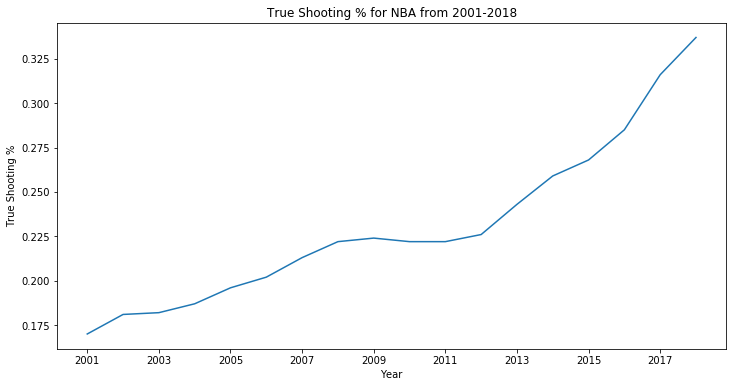

In [466]:
TSP = np.array(big_test.iloc[[3],:])
TSP = TSP.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TSP
lines = ax.plot(x,y)
ax.set(title= 'True Shooting % for NBA from 2001-2018',
      ylabel = 'True Shooting %',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

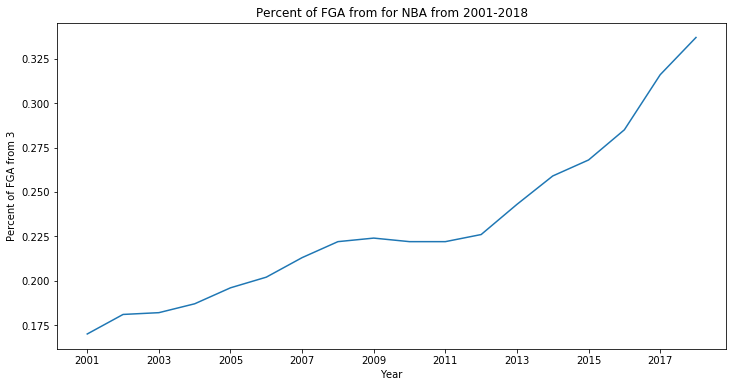

In [467]:
TPAr = np.array(big_test.iloc[[3],:])
TPAr = TPAr.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = TPAr
lines = ax.plot(x,y)
ax.set(title= 'Percent of FGA from for NBA from 2001-2018',
      ylabel = 'Percent of FGA from 3',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

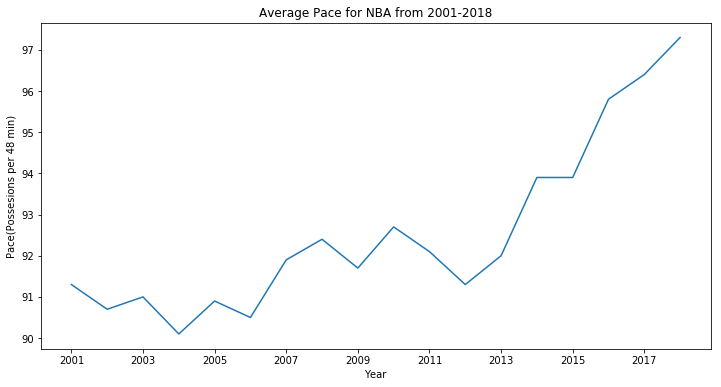

In [468]:
pace = np.array(big_test.iloc[[2],:])
pace = pace.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = pace
lines = ax.plot(x,y)
ax.set(title= 'Average Pace for NBA from 2001-2018',
      ylabel = 'Pace(Possesions per 48 min)',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

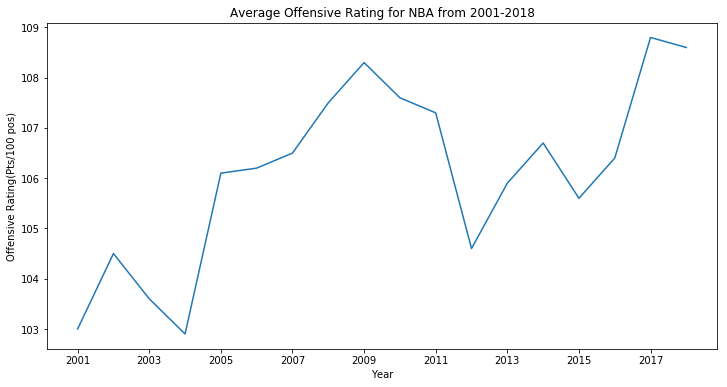

In [494]:
ortg = np.array(big_test.iloc[[0],:])
ortg = ortg.reshape(18,1)
fig, ax = plt.subplots(figsize=(12,6))
x = (2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018)
y = ortg
lines = ax.plot(x,y)
ax.set(title= 'Average Offensive Rating for NBA from 2001-2018',
      ylabel = 'Offensive Rating(Pts/100 pos)',
      xlabel = 'Year')
plt.xticks(range(2001, 2018, 2))
plt.show()

In [441]:
dist2001 = np.array(season_2001['Dist.'])
dist2018 = np.array(season_2018['Dist.'])

In [442]:
dist2001

array([11.9, 11.8, 10.9, 12.3, 11.9, 11.9, 10.8, 13.2, 12.2, 11.9, 11.9,
       12.5, 13. , 12.8, 12.2, 10.7, 12.6, 12.6, 12.3, 12.2, 11.3, 12.5,
       10.9, 12.9, 11.6, 11.4, 11.3, 11.5, 12. , 12. ])

In [443]:
dist2018

array([15. , 13.2, 14. , 13.2, 13.3, 13.2, 13.7, 12.7, 13. , 12.3, 12.8,
       12.5, 13. , 13.8, 13.4, 11.8, 13.2, 13.2, 13.1, 12.4, 12.4, 14.4,
       12.7, 13.7, 13.3, 13.6, 12.8, 12.9, 13.6, 12.5, 13.2])

# Significance Test for Average FGA distance comparing 2001 to 2018

H0: The average distance of a FGA for 2001 = 2018
Ha: The average distance of a FGA for 2001 is not equal to 2018
alpha: .05

I performed a two sample t-test in order to determine if there is a statistical diference between the average FGA distance in 2001 compared to 2018

In [446]:
stats.ttest_ind(dist2001,dist2018, equal_var = False)

Ttest_indResult(statistic=-7.100547142405033, pvalue=1.85962075145101e-09)

### Based on the results of the t-test(pvalue=1.85962075145101e-09) I can reject the null hypothesis with 95% confidence. 

# Chi Square test 

In [489]:
playoff_teams_2018 = season_2018[season_2018['Playoffs']==1]
nonplayoff_teams_2018 = season_2018[season_2018['Playoffs']==0]
playoff_teams_2017 = season_2017[season_2017['Playoffs']==1]
nonplayoff_teams_2017 = season_2017[season_2017['Playoffs']==0]

In [490]:
nonplayoff_teams_2017 = nonplayoff_teams_2017.drop(nonplayoff_teams_2017.index[[-1]])
nonplayoff_teams_2018 = nonplayoff_teams_2018.drop(nonplayoff_teams_2018.index[[-1]])

In [492]:
pt17_18 = pd.merge(playoff_teams_2017,playoff_teams_2018, how='outer')
npt17_18 = pd.merge(nonplayoff_teams_2017,nonplayoff_teams_2018, how='outer')


In [504]:
pt17_18

,W,ORtg,DRtg,Pace,3PAr,TS%,FG%,AST,TOV,PF,PTS,Dist.,2P,0-3,3-10,10-16,Playoffs
0,67.0,115.6,104.0,99.8,0.359,0.597,0.495,2491,1211,1585,9503,14.1,0.641,0.303,0.102,0.107,1
1,61.0,111.1,103.5,94.2,0.281,0.564,0.469,1954,1101,1498,8637,13.5,0.719,0.255,0.159,0.116,1
2,55.0,114.7,109.0,100.0,0.462,0.583,0.462,2070,1240,1634,9458,14.4,0.538,0.321,0.125,0.041,1
3,51.0,112.7,108.2,96.1,0.329,0.574,0.475,1848,1062,1626,8911,14.3,0.671,0.275,0.118,0.081,1
4,51.0,109.6,105.3,91.6,0.327,0.563,0.466,1651,1118,1545,8258,13.1,0.673,0.297,0.152,0.105,1
5,51.0,112.3,107.8,94.7,0.289,0.561,0.464,1517,1041,1708,8762,13.2,0.711,0.254,0.185,0.120,1
6,51.0,113.6,110.3,96.2,0.399,0.580,0.470,1858,1121,1486,9048,14.4,0.601,0.284,0.110,0.092,1
7,53.0,111.2,108.4,96.8,0.393,0.567,0.454,2069,1088,1686,8857,14.2,0.607,0.296,0.129,0.071,1
8,49.0,111.2,109.3,97.4,0.284,0.564,0.475,1956,1162,1745,8953,13.1,0.716,0.300,0.137,0.108,1
9,47.0,108.3,107.5,97.8,0.295,0.540,0.452,1721,1230,1715,8741,12.1,0.705,0.346,0.146,0.104,1


In [501]:
pace_pt17_18 = np.array(pt17_18['Pace'])
pace_npt17_18 = np.array(npt17_18['Pace'])
playoff_chitest = np.hstack((pace_pt17_18,pace_npt17_18))
playoff_chitest

array([ 99.8,  94.2, 100. ,  96.1,  91.6,  94.7,  96.2,  96.8,  97.4,
        97.8,  92.3,  95.3,  96.7,  94.5,  95.9,  97.4,  97.6,  97.4,
        99.6,  95.7,  99.8,  96.7,  96. ,  95. ,  96.5,  96. , 100.5,
        96. ,  98. ,  96.6,  95.6,  96.2,  95.2,  98.3,  95.7,  94.6,
        95. ,  98. ,  92.2,  94.9,  96. , 100.3,  98.5,  98.5,  96.8,
       101.3,  96.8,  98.7,  98.4,  96.2, 100.3,  95.6,  96.8,  98.9,
        98.1,  98.3,  94.9,  94.9,  98.3, 100.3])

In [502]:
pace_pt17_18

array([ 99.8,  94.2, 100. ,  96.1,  91.6,  94.7,  96.2,  96.8,  97.4,
        97.8,  92.3,  95.3,  96.7,  94.5,  95.9,  97.4,  97.6,  97.4,
        99.6,  95.7,  99.8,  96.7,  96. ,  95. ,  96.5,  96. , 100.5,
        96. ,  98. ,  96.6,  95.6,  96.2])

In [503]:
pace_npt17_18

array([ 95.2,  98.3,  95.7,  94.6,  95. ,  98. ,  92.2,  94.9,  96. ,
       100.3,  98.5,  98.5,  96.8, 101.3,  96.8,  98.7,  98.4,  96.2,
       100.3,  95.6,  96.8,  98.9,  98.1,  98.3,  94.9,  94.9,  98.3,
       100.3])

# Junk

In [ ]:
misc = []
for comment in season_01_misc.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        misc.append(tds)
wdf_misc_01 = pd.DataFrame(misc[2:], columns= misc[1])       
df_misc_01 = wdf_misc_01[['Team', 'W', 'ORtg', 'DRtg', 'Pace', '3PAr', 'TS%']]



team_stats = []
for comment in season_01_team.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        team_stats.append(tds)
wdf_team_01 = pd.DataFrame(team_stats[1:], columns= team_stats[0])       
df_team_01 = wdf_team_01[['Team', 'FG%', 'AST', 'TOV', 'PF', 'PTS']]


shoot_stats = []
for comment in season_01_shoot.find_all(string=lambda text:isinstance(text,Comment)):
    data = BeautifulSoup(comment,"lxml")
    for items in data.select("table.stats_table tr"):
        tds = [item.get_text(strip=True) for item in items.select("th,td")]
        shoot_stats.append(tds)
    
wdf_shoot_01 = pd.DataFrame(shoot_stats[3:], columns = shoot_stats[2])
wwdf_shoot_01 = wdf_shoot_01.iloc[:, 0:11]
df_shoot_01 = wwdf_shoot_01[['Team', 'Dist.', '2P' , '0-3', '3-10', '10-16', '16-3pt']]

team_misc = pd.merge(df_misc_01, df_team_01, on='Team', how='outer')
df_season01 = pd.merge(team_misc, df_shoot_01, on='Team', how='outer')